In [1]:


import numpy as np
import jax.numpy as jnp
from jax import random, vmap, jit

from functools import partial
import scipy
import matplotlib.pyplot as plt
import time

from scipy.io import loadmat
import jax.lax as lax
import jax

from admm_qp_solver_1 import qp_solver


import matplotlib.pyplot as plt
# jax.config.update("jax_enable_x64", True)

In [2]:
num = 50
num_batch = 400
t = 0.05

opt_class = qp_solver(num_batch, num, t)

vel_init = 0.6
theta_init = 0.0

vel_min = -1.0
vel_max = 1.0

acc_min = -1.0
acc_max = 1.0

jerk_min = -1.0
jerk_max = 1.0

theta_min = -3.14
theta_max = 3.14

vel_samples = np.random.uniform(-1.5, 1.5,  (num_batch, num)    )



In [3]:
### Create a dataset of raw thetadot samples

# vel_samples = np.random.uniform(-1.5, 1.5,  (num_batch, num)    ) #### joint veclocity

vel_samples = jnp.asarray(vel_samples)




7.9204493
(1000, 400)


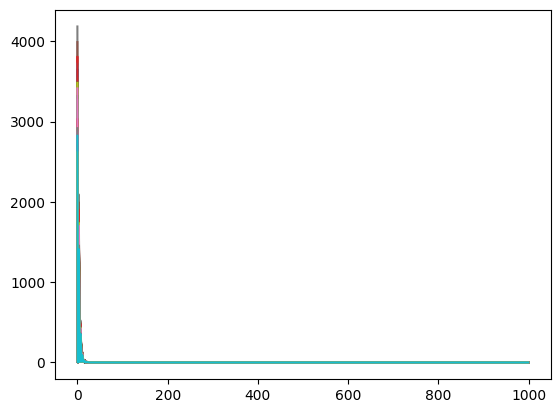

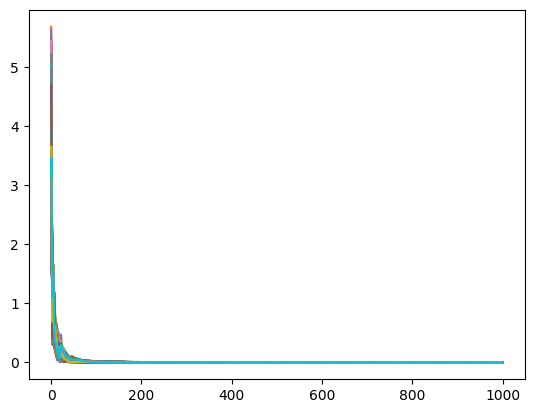

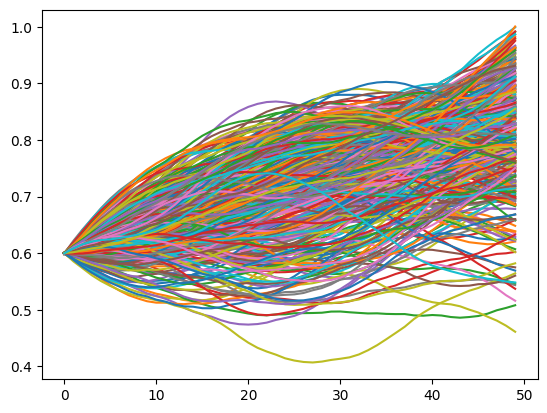

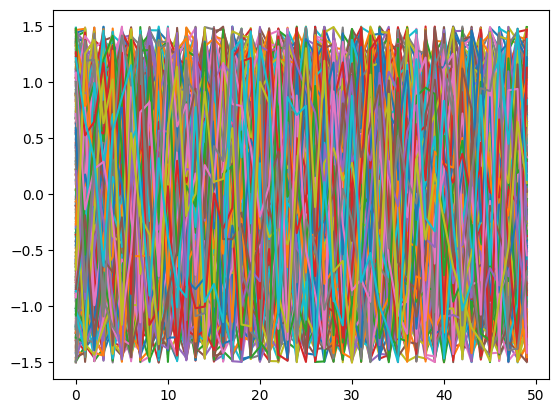

In [4]:

vel_projected = vel_samples

lamda = jnp.zeros(( num_batch, opt_class.nvar    ))



vel_projected, primal_residual, fixed_point_residual  = opt_class.compute_projection(lamda, vel_projected, vel_init, vel_samples, vel_max, vel_min, acc_max, acc_min, jerk_max, jerk_min, theta_min, theta_max, theta_init)


avg = jnp.mean(jnp.linalg.norm(vel_samples-vel_projected, axis = 1))

print(avg)

print(jnp.shape(primal_residual))

# print(primal_residual.T[:, -1])

plt.figure(1)
plt.plot(primal_residual)



plt.figure(2)
plt.plot(fixed_point_residual)


plt.figure(3)
plt.plot(vel_projected.T)

plt.figure(4)
plt.plot(vel_samples.T)


plt.show()

